<a href="https://colab.research.google.com/github/rohitdanda/DeepLearning_DataSets/blob/master/Cifar10_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the data set from keras ciraf10 

In [1]:
from keras.datasets import cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [2]:
x_train.shape

(50000, 32, 32, 3)

After watching the dataset shape and data we need to one hot encoder the labels and normalize the pixel values as train data already had the color channel

In [57]:
from keras.utils.np_utils import to_categorical
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

y_cat_train.shape
y_train.shape

(50000, 1)

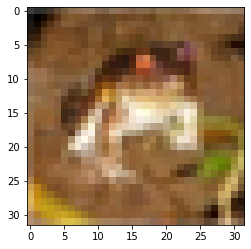

In [12]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [0]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

cleaning the data was finish we need to import the model and layers

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

model = Sequential()
model.add(Conv2D(filters=128,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [107]:
model.fit(x_train,y_cat_train,epochs=20,verbose=2)

Epoch 1/20
 - 13s - loss: 1.6182 - acc: 0.4080
Epoch 2/20
 - 11s - loss: 1.3210 - acc: 0.5314
Epoch 3/20
 - 11s - loss: 1.1927 - acc: 0.5764
Epoch 4/20
 - 11s - loss: 1.0805 - acc: 0.6194
Epoch 5/20
 - 11s - loss: 0.9906 - acc: 0.6527
Epoch 6/20
 - 11s - loss: 0.9186 - acc: 0.6780
Epoch 7/20
 - 11s - loss: 0.8545 - acc: 0.7020
Epoch 8/20
 - 11s - loss: 0.7907 - acc: 0.7254
Epoch 9/20
 - 11s - loss: 0.7294 - acc: 0.7441
Epoch 10/20
 - 11s - loss: 0.6788 - acc: 0.7608
Epoch 11/20
 - 11s - loss: 0.6368 - acc: 0.7756
Epoch 12/20
 - 11s - loss: 0.5945 - acc: 0.7911
Epoch 13/20
 - 11s - loss: 0.5495 - acc: 0.8076
Epoch 14/20
 - 11s - loss: 0.5167 - acc: 0.8208
Epoch 15/20
 - 11s - loss: 0.4953 - acc: 0.8285
Epoch 16/20
 - 11s - loss: 0.4656 - acc: 0.8379
Epoch 17/20
 - 11s - loss: 0.4424 - acc: 0.8467
Epoch 18/20
 - 11s - loss: 0.4150 - acc: 0.8573
Epoch 19/20
 - 11s - loss: 0.4012 - acc: 0.8623
Epoch 20/20
 - 11s - loss: 0.3704 - acc: 0.8736


In [108]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 2s 152us/step


[1.0617257992744447, 0.7002]

In [110]:
from sklearn.metrics import classification_report
predict = model.predict_classes(x_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.76      0.69      0.73      1000
           1       0.86      0.81      0.83      1000
           2       0.66      0.57      0.61      1000
           3       0.49      0.51      0.50      1000
           4       0.65      0.63      0.64      1000
           5       0.60      0.59      0.59      1000
           6       0.75      0.79      0.77      1000
           7       0.75      0.77      0.76      1000
           8       0.76      0.83      0.80      1000
           9       0.73      0.81      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

